# Assignment 2

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/assignments/MIT18_05S14_ps2.pdf

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

a)  0.5

| HYPOTHESIS   | PRIOR |  LIKELIHOOD | MULTIPLIER | POSTERIOR |
|:----------|-------------:|------:|------:|------:|
| 1=G 2=B |  0.25 | 1.0 | 0.25 | 0.50 |
| 1=G 2=G |  0.25 | 1.0 | 0.25 | **0.50** |
| 1=B 2=B |  0.25 | 0.0 | 0.00 | 0.00 |
| 1=B 2=G |  0.25 | 0.0 | 0.00 | 0.00 |


b)  0.33

| HYPOTHESIS   | PRIOR |  LIKELIHOOD | MULTIPLIER | POSTERIOR |
|:----------|-------------:|------:|------:|------:|
| 1=G 2=B |  0.25 | 1.0 | 0.25 | 0.33 |
| 1=G 2=G |  0.25 | 0.0 | 0.00 | 0.00 |
| 1=B 2=B |  0.25 | 1.0 | 0.25 | **0.33** |
| 1=B 2=G |  0.25 | 1.0 | 0.25 | 0.33 |

## Problem 2

P(C=B) = 0.01 # probablity that the **C**ar was recogized as color **B**lue  
P(C=G) = 0.99  

P(S=B|C=B) = 0.99  
P(S=B|C=G) = 0.02  

P(C=B|S=B)=????


P(H|D) = P(D|H)*P(H)/P(D)


| HYPOTHESIS   | PRIOR |  LIKELIHOOD | MULTIPLIER | POSTERIOR |
|:----------|-------------:|------:|------:|------:|
| C=B |  0.01 | 0.99 | 0.0099 | **0.333** |
| C=G |  0.99 | 0.02 | 0.0198 | 0.666 |



## Problem 3

### first draw
P(F=1) = 0.5 # probalility that the **F**irst card is 1  
P(F=2) = 0.5 # probalility that the **F**irst card is 1  

### second draw
P(S=1|F=1) = 3/7  # end  
P(S=2|F=1) = 4/7  # end  

P(S=1|F=2) = 4/7 # continue  
P(S=2|F=2) = 3/7 # continue  

### third draw
P(T=1|S=1,F=2) = 3/6 # end  
P(T=2|S=1,F=2) = 3/6 # end  

P(T=1|S=2,F=2) = 4/6 # end  
P(T=2|S=2,F=2) = 2/6 # end  


| EVENT   | JOINT PROB |  X | MULTIPLIER | 
|:----------|-------------:|------:|------:|
| P(S=1,F=1) |  0.5*3/7 | 2 | 0.42857142857142855 |
| P(S=2,F=1) |  0.5*4/7 | 3 | 0.8571428571428571 |
| P(T=1,S=1,F=2) |  0.5\*4/7\*0.5 | 4 | 0.5714285714285714 |
| P(T=2,S=1,F=2) | 0.5\*4/7\*0.5 | 5 | 0.7142857142857142 |
| P(T=1,S=2,F=2) | 0.5\*3/7\*4/6 | 5 | 0.7142857142857142 |
| P(T=2,S=2,F=2) | 0.5\*3/7\*2/6 | 6 | 0.42857142857142855 |


In [21]:
# check probablity
0.5*3/7 + 0.5*4/7 + 0.5*4/7*0.5 + 0.5*4/7*0.5 + 0.5*3/7*4/6 + 0.5*3/7*2/6

0.9999999999999998

In [22]:
# calculate E(X)
0.42857142857142855 + 0.8571428571428571 + 0.5714285714285714 + 0.7142857142857142 + 0.7142857142857142 + 0.42857142857142855 

3.714285714285714

## Problem 4

In [24]:
x = np.array([4,6,8])
p = np.array([1,1,2])
p = p/p.sum()
p

array([0.25, 0.25, 0.5 ])

Text(0.5, 0, 'X')

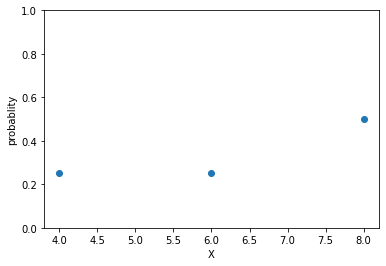

In [36]:
plt.scatter(x, p)
plt.ylim(bottom=0, top=1)
plt.ylabel("probablity")
plt.xlabel("X")

In [39]:
prior = p
prior

array([0.25, 0.25, 0.5 ])

In [38]:
likelihood= 1/x
likelihood

array([0.25      , 0.16666667, 0.125     ])

In [40]:
multiplier = prior * likelihood
multiplier

array([0.0625    , 0.04166667, 0.0625    ])

In [42]:
posterior = multiplier/multiplier.sum()
posterior

array([0.375, 0.25 , 0.375])

b) 4-side and 8-side dices are most likely with probablity equals to 0.375  
c) 8 side dice will be most likely, because 4 dice is now impossible and prob(8-dice) > prob (6-dice) no matter if R=3 or R=6  
d) 8-dice is the only possible one  


## Problem 5

In [55]:
from itertools import groupby

In [58]:
for a, b in groupby([1,1,0,0,1,0,0,0,0,1,1]):
    print(a,list(b))

1 [1, 1]
0 [0, 0]
1 [1]
0 [0, 0, 0, 0]
1 [1, 1]


In [63]:
def simulate_max_len(trials, tosses):
    row_max_lengths = []
    for row in np.random.randint(0,2, size=(int(trials),tosses)):
        max_len = 0
        for value, sequence in groupby(row):
            max_len = max(max_len, len(list(sequence)))
        row_max_lengths.append(max_len)
    return np.array(row_max_lengths).mean()

In [68]:
# c) answer
simulate_max_len(10_000, 50)

5.9648

In [69]:
def simulate_max_len_threshold(trials, tosses, threshold):
    row_max_lengths = []
    for row in np.random.randint(0,2, size=(int(trials),tosses)):
        max_len = 0
        for value, sequence in groupby(row):
            max_len = max(max_len, len(list(sequence)))
        if max_len >= threshold:
            row_max_lengths.append(1)
        else:
            row_max_lengths.append(0)
    return np.array(row_max_lengths).mean()

In [71]:
# d) answer
simulate_max_len_threshold(10_000, 50, 8)

0.1622